In [46]:
import scipy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import numpy.polynomial.polynomial as poly


df_arac = pd.read_csv(u'arac.csv',sep=';',)
df_arac_pre = df_arac[df_arac['Year']<2014][['Car','Year']]
df_arac_post = df_arac[df_arac['Year']>=2014][['Car','Year']]
#BaseYear = 1965
#x = np.squeeze(np.array(df_arac.Year[0:]).T-BaseYear)
x = np.squeeze(np.array(df_arac_pre.Year[0:]))
y = np.squeeze(np.array([df_arac_pre.Car[0:]]).T/1000000.)
results={}
for degree in range(1,11):
    p=np.polyfit(x,y,degree)
    yy=np.polyval(p,x)
    error=np.sum((yy-y)**2)**0.5
    xPost=np.squeeze(np.array(df_arac_post.Year[0:]))
    yPost=np.squeeze(np.array([df_arac_post.Car[0:]]).T/1000000.) 
    yyPost=np.polyval(p,xPost)
    extrapolationError=np.sum(((yPost-yyPost)**2))**0.5   
    results[degree]=(yy,error,extrapolationError,p,degree)
    print('degree:',degree,'error:',error,'extrapolation error:',extrapolationError)
key_min = min(results,key=lambda x:results[x][2])
print("Minimum Error Degree:",key_min)

degree: 1 error: 6.17020249433 extrapolation error: 4.09338200756
degree: 2 error: 1.20508694136 extrapolation error: 0.971592889153
degree: 3 error: 1.05052323072 extrapolation error: 0.564395804641
degree: 4 error: 1.04324776647 extrapolation error: 0.678083482433
degree: 5 error: 0.934225172047 extrapolation error: 0.104565875348
degree: 6 error: 0.933423384537 extrapolation error: 0.100424352662
degree: 7 error: 0.932619007979 extrapolation error: 0.0962762025603
degree: 8 error: 0.931813081996 extrapolation error: 0.0921189307613
degree: 9 error: 0.765055904185 extrapolation error: 0.8268337351
degree: 10 error: 0.765369964977 extrapolation error: 0.828884446051
Minimum Error Degree: 8


C:\Users\Ericsson\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Ericsson\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Ericsson\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Ericsson\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Users\Ericsson\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:595: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


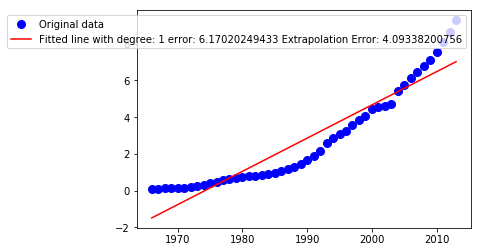

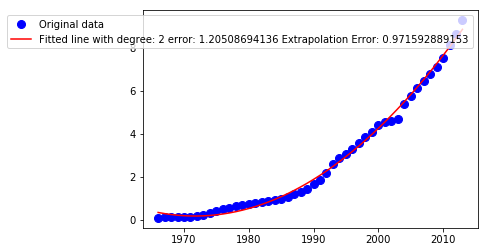

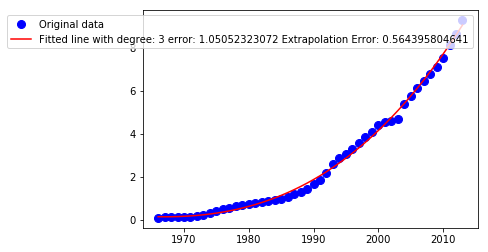

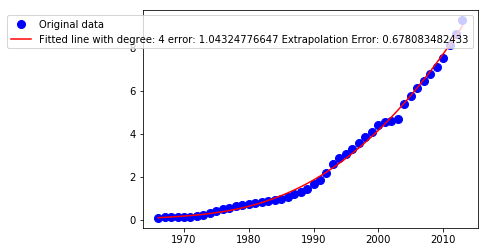

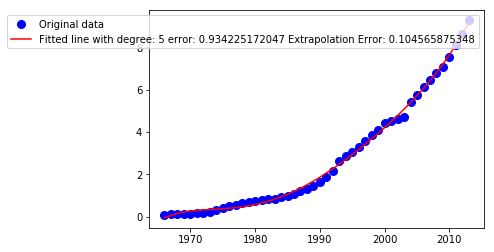

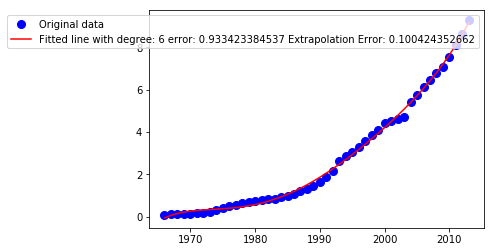

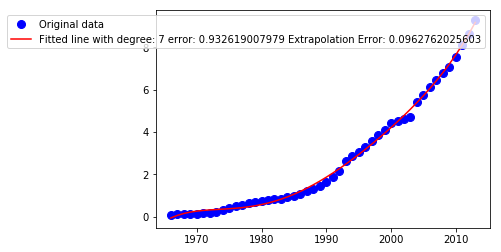

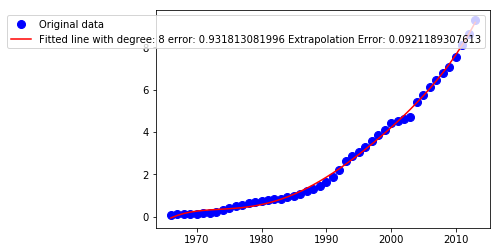

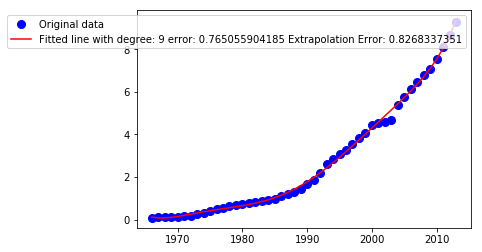

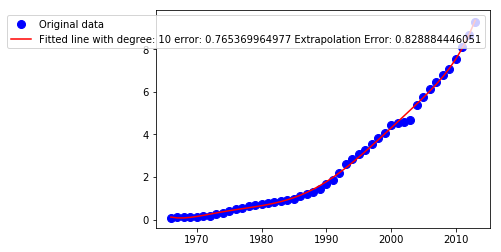

In [45]:
import matplotlib.pyplot as plt

for degree in range(1,11):
    plt.figure(degree)
    plt.plot(x, y, 'bo', label='Original data', markersize=8)
    plt.plot(x, results[degree][0], 'r', label='Fitted line with degree: '+str(degree)+' error: '+str(results[degree][1])+' Extrapolation Error: '+str(results[degree][2]))
    plt.legend()
    plt.show()